In [1]:
# algorithms
def import_image(filename, size):
    img = Image.open(filename)
    img = img.resize(size)
    img = ImageTk.PhotoImage(img)
    return img
    
def ReduceOpacity(im, opacity):
    assert opacity >= 0 and opacity <= 1
    if im.mode != 'RGBA':
        im = im.convert('RGBA')
    else:
        im = im.copy()
    alpha = im.split()[3]
    alpha = ImageEnhance.Brightness(alpha).enhance(opacity)
    im.putalpha(alpha)
    return im

def exit_window(win):
    global row_count
    global count
    count = 4
    row_count = 4
    win.destroy()
    
def ref_azimuth(dep, lat):
    ratio = 0 
    try: 
        ratio = dep/lat
    except: 
        if dep>0:
            return 270
        elif dep<0:
            return 90
    angle = math.degrees(math.atan(ratio))  #gets the reference angle through the arctangent function; can be negative
    if lat > 0 and dep == 0:
        azimuth = 180
    if lat < 0 and dep == 0:
        azimuth = 0
    if lat < 0 and dep < 0:        #checks if the angle is referenced from quadrant III
        azimuth = angle
    elif lat > 0 and dep < 0:      #checks if the angle is referenced from quadrant II
        azimuth = 180 + angle
    elif lat > 0 and dep > 0:      #checks if angle is referenced from quadrant I
        azimuth = 180 + angle
    elif lat < 0 and dep > 0:      #checks if angle is referenced from quadrant IV 
        azimuth = 360 + angle
    return azimuth

def get_bearing(azimuth, azimuth_direction="S"):
    north_d, east_d, south_d, west_d = "North", "East", "South", "West"    #assigns the 4 directions to variables 
    azimuth = float(azimuth)      #makes sure that the azimuth parameter is converted to float
    b_angle = azimuth % 180   
    if b_angle > 90: 
        b_angle = 180 - b_angle
    
    # converts the bearing angle into Degrees-Minutes-Seconds form 
    degree = int(b_angle)
    minute = int(abs((b_angle - degree)*60))
    second = int(abs((b_angle - degree)*60 - minute)*60)
    
    # if the user inputed "S" which means that zero azimuth direction is South, flips all directions
    # South becomes North, North becomes South, East becomes West, West becomes East 
    if azimuth_direction == "S":
        north_d, east_d, south_d, west_d = "South", "West", "North", "East"
    
    # if azimuth entered is 0, 90, 180, 270, or 360, prints "Due" + the direction depending on the angle
    if azimuth in [0,360]:  return "Due {}".format(north_d)
    if azimuth == 90:       return "Due {}".format(east_d)
    if azimuth == 180:      return "Due {}".format(south_d)
    if azimuth == 270:      return "Due {}".format(west_d)
    

    elif azimuth < 90: 
        return "{0} {1}°{2:02d}\' {3}".format(north_d[0], degree, minute, east_d[0])
    elif 90 < azimuth < 180: 
        return "{0} {1}°{2:02d}\' {3}".format(south_d[0], degree, minute, east_d[0])
    elif 180 < azimuth < 270:
        return "{0} {1}°{2:02d}\' {3}".format(south_d[0], degree, minute, west_d[0])
    elif 270 < azimuth < 360: 
        return "{0} {1}°{2:02d}\' {3}".format(north_d[0], degree, minute, west_d[0])
    
def get_tree_data(tree):
    list_container = []
    list_row = []
    list_container.append(list(tree["columns"]))
    for line in tree.get_children():
        for value in tree.item(line)["values"]:
            list_row.append(value)
        list_container.append(list_row)
        list_row = []
    return list_container

def decimal_choice_clicked(value_decimal):
    global decimal_clicked2
    decimal_clicked2 = value_decimal
    
def roundOr_trunc_clicked2(value_decimal):
    global roundOrTrunc_choice2
    roundOrTrunc_choice2 = value_decimal
    
def rnd_trunc(value):
    global roundOrTrunc_choice2
    global decimal_clicked2
    if roundOrTrunc_choice2 == 1:
        if decimal_clicked2 == 0:
            return int(value)
        return round(value, decimal_clicked2)
    if roundOrTrunc_choice2 == 2:
        stepper = 10**decimal_clicked2
        return math.trunc(stepper*value)/stepper

def df_readexcel():
    global headers
    filename = tk.filedialog.askopenfilename(initialdir="{}".format(os.getcwd()), title="Select A File", 
                                                 filetype=(("xlsx files", "*.xlsx"), ("csv files", "*.csv"), 
                                                           ("All Files", "*.*")))
    try: 
        excel_filename = r"{}".format(filename)
        df = pd.read_excel(excel_filename)
    except ValueError:
        tk.messagebox.showerror("Information", "The file you have chosen is invalid")
        return None
    except FileNotFoundError: 
        if excel_filename == "":
            return None
        tk.messagebox.showerror("Information", f"No file such as {filename}")
        return None

    headers = list(df.columns)
    df_rows = df.values.tolist()
    return (filename, df_rows)
    

    

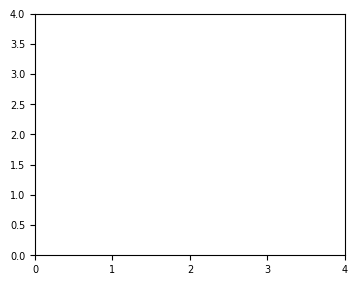

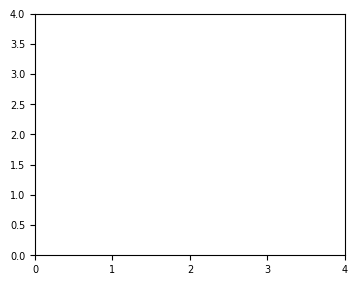

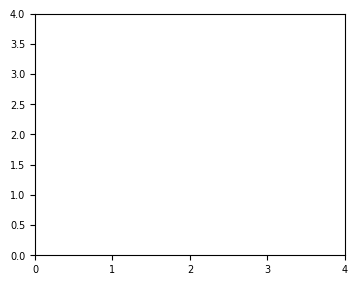

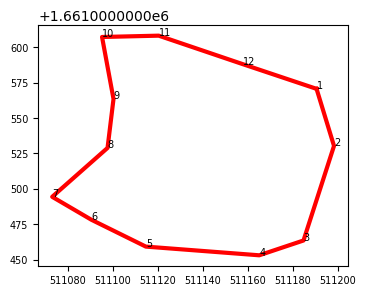

In [2]:
import math
import pandas as pd 
import xlsxwriter
import os
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter import filedialog
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter.font as font
from PIL import ImageTk,Image, ImageEnhance
import simplekml

window = tk.Tk()
window.title("GE120 Project - MARIMON")
screen_width = window.winfo_screenwidth()
screen_height = window.winfo_screenheight()
window.geometry(f"1250x560+{int(screen_width/2-1250/2)}+{int(screen_height/2-560/2-20)}")
window.iconbitmap("logo2.ico")

img = Image.open("background4.png")
img = img.resize((1549, 987))
img = ReduceOpacity(img, 0.87)
img1 = ImageTk.PhotoImage(img)
label_background1 = tk.Label(window, image=img1)
label_background1.place(x=-100, y=-300)

img_frame = Image.open("main_frame_icon1.png")
img_frame = ImageTk.PhotoImage(img_frame)


CTR_icon = Image.open("CTR_icon3.png")
CTR_icon = ImageTk.PhotoImage(CTR_icon)

LTD_icon = Image.open("LTD_icon1.png")
LTD_icon = ImageTk.PhotoImage(LTD_icon)

PGE_icon = Image.open("PGE_icon1.png")
PGE_icon = ImageTk.PhotoImage(PGE_icon)

img_back_btn = Image.open("back button3.png")
img_back_btn = img_back_btn.resize((48, 48))
img_back_btn = ImageTk.PhotoImage(img_back_btn)

img_import = Image.open("excel icon.jpg")
img_import = img_import.resize((32, 32))
img_import = ImageTk.PhotoImage(img_import)

img_input = Image.open("input icon.png")
img_input = img_input.resize((32, 32))
img_input = ImageTk.PhotoImage(img_input)

img_export = Image.open("export icon.jpg")
img_export = img_export.resize((32, 32))
img_export = ImageTk.PhotoImage(img_export)

excel_picture = Image.open("excel_picture.png")
excel_picture = ImageTk.PhotoImage(excel_picture)

right_arrow = Image.open("right_arrow.png")
right_arrow = right_arrow.resize((82, 67))
right_arrow = ImageTk.PhotoImage(right_arrow)

google_earth_picture = Image.open("google_earth_picture.png")
google_earth_picture = google_earth_picture.resize((474, 282))
google_earth_picture = ImageTk.PhotoImage(google_earth_picture)

count = 4
line2_list = []
decimal_clicked2 = 3
roundOrTrunc_choice2 = 1
clicked_choice2 = 1
mode_input2 = None
master_datalist = []
lines3_list = []
master3_list = []
mode_input3 = None
row_count = 4 
corner_list = []
northing_list = []
easting_list = []
show_choice = 0
points2_kml = []
headers = []


def tab1():
    label_mainframe = tk.Label(window, image=img_frame, borderwidth=2, relief="solid", width=830, height=430, bg="#B57C3A")
    label_mainframe.place(relx=0.5, rely=0.5, anchor="center")
    label_mainframe.tkraise(aboveThis=label_background1)
    def tab2():
        label_mainframe.destroy()
        widget1_CTR_frame.destroy()
        widget2_LTD_frame.destroy()
        widget1_CTR_button.destroy()
        widget2_LTD_button.destroy()
        widget3_KML_button.destroy()
        
        def open_input_win2():
            global line2_list
            input_win2 = tk.Toplevel(window)
            input_win2.title("Input Distances and Azimuths")
            input_win2_width = 700
            input_win2_height = 400
            x = screen_width/2 - input_win2_width/2
            y = screen_height/2 - input_win2_height/2-100
            input_win2.geometry(f"{input_win2_width}x{input_win2_height}+{int(x)}+{int(y)}")
            input_win2.iconbitmap("logo2.ico")
            
         
            
            
            frame_win2_in = tk.LabelFrame(input_win2, text="", width=550, height=200, borderwidth=2)
            frame_win2_in.grid(row=1, column=0, padx=30, pady=15, sticky="n")
            
            
            frame2_win2= tk.LabelFrame(input_win2, text="", borderwidth=0)
            frame3_win3 = tk.LabelFrame(input_win2, borderwidth=0)
         
            line_label2 = tk.Label(frame_win2_in, text="Line", width=10, relief="solid", borderwidth=1.5)
            distance_label2 = tk.Label(frame_win2_in, text="Distance", width=30, relief="solid", borderwidth=1.5)
            azimuth_label2 = tk.Label(frame_win2_in, text="Azimuth", width=30, relief="solid", borderwidth=1.5)
         
            line_label2.grid(row=0, column=0)
            distance_label2.grid(row=0, column=1)
            azimuth_label2.grid(row=0, column=2)
         
       
            line2_1 = tk.Label(frame_win2_in, text="1-2")
            line2_2 = tk.Label(frame_win2_in, text="2-3")
            line2_3 = tk.Label(frame_win2_in, text="3-4")
            line2_4 = tk.Label(frame_win2_in, text="4-5")
            distance2_1 = tk.Entry(frame_win2_in, width=30, justify="center")
            distance2_2 = tk.Entry(frame_win2_in, width=30, justify="center")
            distance2_3 = tk.Entry(frame_win2_in, width=30, justify="center")
            distance2_4 = tk.Entry(frame_win2_in, width=30, justify="center")
            azimuth2_1 = tk.Entry(frame_win2_in, width=30, justify="center")
            azimuth2_2 = tk.Entry(frame_win2_in, width=30, justify="center")
            azimuth2_3 = tk.Entry(frame_win2_in, width=30, justify="center")
            azimuth2_4 = tk.Entry(frame_win2_in, width=30, justify="center")

         
            line2_list = [line2_1, line2_2, line2_3, line2_4]
            distance2_list = [distance2_1, distance2_2, distance2_3, distance2_4]
            azimuth2_list = [azimuth2_1, azimuth2_2, azimuth2_3, azimuth2_4]
            for i in range(len(line2_list)):
                line2_list[i].grid(row=i+1, column=0)
                distance2_list[i].grid(row=i+1, column=1)
                azimuth2_list[i].grid(row=i+1, column=2)

           

            def addrow2():
                global count     
                            
                temp_line2 = tk.Label(frame_win2_in, text=f"{count+1}-{count+2}")
                temp_distance2 = tk.Entry(frame_win2_in, width=30, justify="center")      
                temp_azimuth2 = tk.Entry(frame_win2_in, width=30, justify="center")
                
                temp_line2.grid(row=count+1, column=0)
                temp_distance2.grid(row=count+1, column=1)
                temp_azimuth2.grid(row=count+1, column=2)
        
                
                line2_list.append(temp_line2)
                distance2_list.append(temp_distance2)
                azimuth2_list.append(temp_azimuth2)
                count += 1    
                if count == 13:
                    addrow2_btn.config(state="disabled")
                if count == 1:
                    delete2_btn.config(state="normal")
        
            def del_lrow2():
                global count
               
                try:
                    line2_list[-1].destroy()
                    distance2_list[-1].destroy()
                    azimuth2_list[-1].destroy()

                    line2_list.pop()
                    distance2_list.pop()
                    azimuth2_list.pop()
                    count -= 1
                except IndexError: 
                    return None
                if count == 0:
                    delete2_btn.config(state="disabled")
                if count < 13:
                    addrow2_btn.config(state="normal")
                
            def enter2_data():
                global decimal_clicked2
                global clicked_choice2
                global mode_input2
                global master_datalist
                global count
                count = 4
                sum_distance = 0
                components = []
                sum_lat = 0
                sum_dep = 0
                sum_abs_lat = 0
                sum_abs_dep = 0
                corr_list = []
                sum_c_lat = 0
                sum_c_dep = 0
                sum_adj_lat = 0
                sum_adj_dep = 0
                lec_value_2 = 0 
                rec_value_2 = 0
                adj_dist_azim = []
            
                try: 
                    for i in range(len(distance2_list)):
                        distance_fl = float(distance2_list[i].get())
                        sum_distance += distance_fl
                        latitude = -distance_fl*math.cos(math.radians(float(azimuth2_list[i].get())))
                        departure = -distance_fl*math.sin(math.radians(float(azimuth2_list[i].get())))
                        sum_lat += latitude
                        sum_dep += departure
                        sum_abs_lat += abs(latitude)
                        sum_abs_dep += abs(departure)
                        components.append((latitude, departure))
                except: 
                        label_file2["text"] = "Input Error. Please input correct values. "
                        label_file2["fg"] = "red"
                        for record in tree2.get_children():
                            tree2.delete(record)
                        input_win2.destroy()
                        return None
                for i in range(len(distance2_list)):
                    distance_fl = float(distance2_list[i].get())
                    if clicked_choice2 == 1:
                        
                        try:
                            c_lat = -sum_lat*distance_fl/sum_distance
                            c_dep = -sum_dep*distance_fl/sum_distance
                        except ZeroDivisionError:
                            label_file2["text"] = "Zero Division Error. Please input correct values."
                            label_file2["fg"] = "red"
                            for record in tree2.get_children():
                                tree2.delete(record)
                            input_win2.destroy()
                            return None
                        
                    elif clicked_choice2 == 2:
                        c_lat = -sum_lat*abs(components[i][0])/sum_abs_lat
                        c_dep = -sum_dep*abs(components[i][1])/sum_abs_dep
                    sum_c_lat += c_lat 
                    sum_c_dep += c_dep 
                    adj_lat = components[i][0] + c_lat
                    adj_dep = components[i][1] + c_dep
                    adj_distance = math.sqrt(adj_lat**2 + adj_dep**2)
                    try:
                        adj_azimuth = ref_azimuth(adj_dep, adj_lat)
                    except:
                        label_file2["text"] = "Input Error. Please input correct values. "
                        label_file2["fg"] = "red"
                        for record in tree2.get_children():
                            tree2.delete(record)
                        input_win2.destroy()
                        return None
                        
                    sum_adj_lat += adj_lat 
                    sum_adj_dep += adj_dep
                    corr_list.append((c_lat, c_dep, adj_lat, adj_dep))
                    adj_dist_azim.append((adj_distance, adj_azimuth))
        
                lec_value_2 = math.sqrt(sum_c_lat**2 + sum_c_dep**2)
                rec_value_2 = lec_value_2/sum_distance
        
                for record in tree2.get_children():
                    tree2.delete(record)
                tree_count = 1
                for i in range(len(line2_list)):
                    tree2.insert(parent="", index="end", iid=tree_count, values=(tree_count, line2_list[i].cget("text"), 
                                    distance2_list[i].get(), azimuth2_list[i].get(), rnd_trunc(components[i][0]),
                                    rnd_trunc(components[i][1]), rnd_trunc(corr_list[i][0]), 
                                    rnd_trunc(corr_list[i][1]), rnd_trunc(corr_list[i][2]), 
                                    rnd_trunc(corr_list[i][3]), rnd_trunc(adj_dist_azim[i][0]), 
                                    rnd_trunc(adj_dist_azim[i][1])))
                    tree_count += 1
   
                tree2.delete(tree_count-1)
                x = tree_count-2
                tree2.insert(parent="", index="end", iid=x+1, values=(x+1, f"{x+1}-1", 
                                    distance2_list[x].get(), azimuth2_list[x].get(), rnd_trunc(components[x][0]),
                                    rnd_trunc(components[x][1]), rnd_trunc(corr_list[x][0]), 
                                    rnd_trunc(corr_list[x][1]), rnd_trunc(corr_list[x][2]), 
                                    rnd_trunc(corr_list[x][3]), rnd_trunc(adj_dist_azim[x][0]), 
                                    rnd_trunc(adj_dist_azim[x][1])))
                       
                tree2.insert(parent="", index="end", iid="blank", values=())
                tree2.insert(parent="", index="end", iid="Sum", values=("Sum:", "", sum_distance,
                                                    "", rnd_trunc(sum_lat), rnd_trunc(sum_dep),
                                                    rnd_trunc(sum_c_lat), rnd_trunc(sum_c_dep),
                                                    abs(rnd_trunc(sum_adj_lat)), 
                                                    abs(rnd_trunc(sum_adj_dep))))
                tree2.insert(parent="", index="end", iid="blank2", values=())
                tree2.insert(parent="", index="end", values=("LEC:", rnd_trunc(lec_value_2)))
                tree2.insert(parent="", index="end", values=("REC:", rnd_trunc(rec_value_2)))
                decimal_clicked2 = 3
                mode_input2 = 1 
                master_datalist = get_tree_data(tree2)
                export2_button.config(state="normal")
                count = 4
                label_file2["text"] = "No file selected."
                label_file2["fg"] = "black"
                input_win2.destroy()
        
                            
            addrow2_btn = tk.Button(frame2_win2, text="Add Row", command=addrow2)
            delete2_btn = tk.Button(frame2_win2, text="Delete Last Row", command=del_lrow2)
            ok2_btn = tk.Button(input_win2, text="Enter Data", command=enter2_data)
            cancel_button2 = tk.Button(input_win2, text="Cancel", command=lambda: exit_window(input_win2))
             

           
            frame2_win2.grid(row=1, column=1, sticky="n")
            frame3_win3.grid(row=2, column=0)
            
            addrow2_btn.grid(row=0, column=1, pady=50, sticky="n")
            delete2_btn.grid(row=1, column=1)
            ok2_btn.place(relx=0.3, rely=0.85, anchor="center")
            cancel_button2.place(relx=0.5, rely=0.85, anchor="center")
         
            
        def click_choice2(value):
            global clicked_choice2
            clicked_choice2 = value
        def filedialog2():
            global headers
         
            try:
                filename_n_data = df_readexcel()
                start_index = filename_n_data[0].rfind("/") + 1 
                label_file2["text"] = filename_n_data[0][start_index:]
                label_file2["fg"] = "black"
            except: 
                return None
            
            if headers != ["Distance", "Azimuth"]:
                label_file2["text"] = "Incorrect headers. Make sure that input file is in the correct format."
                label_file2["fg"] = "red"
                for record in tree2.get_children():
                    tree2.delete(record)
                return None   
                
            df_rows = filename_n_data[1]
            
            global clicked_choice2
            global mode_input2
            global master_datalist
            sum_distance = 0
            components = []
            sum_lat = 0
            sum_dep = 0
            sum_abs_lat = 0
            sum_abs_dep = 0
            corr_list = []
            sum_c_lat = 0
            sum_c_dep = 0
            sum_adj_lat = 0
            sum_adj_dep = 0
            lec_value_2 = 0
            rec_value_2 = 0
            adj_dist_azim = []
            
            try:
                for i in range(len(df_rows)):
                    sum_distance += df_rows[i][0]
                    latitude = -df_rows[i][0]*math.cos(math.radians(df_rows[i][1]))
                    departure = -df_rows[i][0]*math.sin(math.radians(df_rows[i][1]))
                    sum_lat += latitude
                    sum_dep += departure
                    sum_abs_lat += abs(latitude)
                    sum_abs_dep += abs(departure)
                    components.append((latitude, departure))
            except TypeError:
                label_file2["text"] = "Input Error. Make sure that input file contains the correct values. "
                label_file2["fg"] = "red"
                for record in tree2.get_children():
                    tree2.delete(record)
                return None   
                
            for i in range(len(df_rows)):
                    if clicked_choice2 == 1:
                        c_lat = -sum_lat*df_rows[i][0]/sum_distance
                        c_dep = -sum_dep*df_rows[i][0]/sum_distance
                    elif clicked_choice2 == 2:
                        c_lat = -sum_lat*abs(components[i][0])/sum_abs_lat
                        c_dep = -sum_dep*abs(components[i][1])/sum_abs_dep
                    sum_c_lat += c_lat 
                    sum_c_dep += c_dep 
                    adj_lat = components[i][0] + c_lat
                    adj_dep = components[i][1] + c_dep
                    adj_distance = math.sqrt(adj_lat**2 + adj_dep**2)
                    adj_azimuth = ref_azimuth(adj_dep, adj_lat)
                    sum_adj_lat += adj_lat 
                    sum_adj_dep += adj_dep
                    corr_list.append((c_lat, c_dep, adj_lat, adj_dep))
                    adj_dist_azim.append((adj_distance, adj_azimuth))
            lec_value_2 = math.sqrt(sum_c_lat**2 + sum_c_dep**2)
            rec_value_2 = lec_value_2/sum_distance
            for record in tree2.get_children():
                    tree2.delete(record)
            tree_count = 1
            for i in range(len(df_rows)):
                tree2.insert(parent="", index="end", iid=tree_count, values=(tree_count, f"{i+1}-{i+2}", 
                                df_rows[i][0], df_rows[i][1], rnd_trunc(components[i][0]),
                                rnd_trunc(components[i][1]), rnd_trunc(corr_list[i][0]), 
                                rnd_trunc(corr_list[i][1]), rnd_trunc(corr_list[i][2]), 
                                rnd_trunc(corr_list[i][3]), rnd_trunc(adj_dist_azim[i][0]), rnd_trunc(adj_dist_azim[i][1])))
                tree_count += 1
            
            tree2.delete(tree_count-1)
            x = tree_count-2
            tree2.insert(parent="", index="end", iid=x+1, values=(x+1, f"{x+1}-1", 
                                df_rows[x][0], df_rows[x][1], rnd_trunc(components[x][0]),
                                rnd_trunc(components[x][1]), rnd_trunc(corr_list[x][0]), 
                                rnd_trunc(corr_list[x][1]), rnd_trunc(corr_list[x][2]), 
                                rnd_trunc(corr_list[x][3]), rnd_trunc(adj_dist_azim[x][0]), 
                                rnd_trunc(adj_dist_azim[x][1])))
            
            
            tree2.insert(parent="", index="end", iid="blank", values=())
            tree2.insert(parent="", index="end", iid="Sum", values=("Sum:", "", sum_distance,
                                                "", rnd_trunc(sum_lat), rnd_trunc(sum_dep),
                                                rnd_trunc(sum_c_lat), rnd_trunc(sum_c_dep),
                                                abs(rnd_trunc(sum_adj_lat)), abs(rnd_trunc(sum_adj_dep))))
            tree2.insert(parent="", index="end", iid="blank2", values=())
            tree2.insert(parent="", index="end", values=("LEC:", rnd_trunc(lec_value_2)))
            tree2.insert(parent="", index="end", values=("REC:", rnd_trunc(rec_value_2), "≈ 1/{}".format(int(1/rec_value_2))))
            
            mode_input2 = 2
            master_datalist = get_tree_data(tree2)
            export2_button.config(state="normal")
  
            

            
        def export_filedialog2():
            global master_datalist
            try:
                export_file = tk.filedialog.asksaveasfilename(defaultextension=".xlsx", initialdir="{}".format(os.getcwd()), 
                                                title="Save File", filetypes=(("xlsx files", "*.xlsx"), ("csv files", "*.csv"),
                                                                          ("All Files", "*.*")))
                ocwd = os.getcwd()
                os.chdir(os.path.dirname(export_file))
            except:
                return None
      
            outWorkbook = xlsxwriter.Workbook(os.path.basename(export_file))
            outSheet = outWorkbook.add_worksheet()
            cell_format = outWorkbook.add_format()
            cell_format.set_align("center")
            for row_num,data in enumerate(master_datalist):
                outSheet.write_row(row_num, 0, data, cell_format)        
            
            outWorkbook.close()
            os.chdir(ocwd)
            
        greater_frame2 = tk.LabelFrame(window)
        greater_frame2.place(relx=0.5, rely=0.47, anchor="center")
        top_frame2 = tk.LabelFrame(greater_frame2, borderwidth=1)
        top_frame2.grid(row=0, column=0, sticky="w")
        label_frame2 = tk.LabelFrame(top_frame2, borderwidth=0)
        label_frame2.grid()
        label_file2 = tk.Label(label_frame2, text="No file selected.", width=53, borderwidth=0, justify="center")  
        label_file2.grid(row=0, column=0, sticky="w")
        
        rule_choice_frame = tk.LabelFrame(top_frame2)
        rule_choice_frame.grid(row=0, column=1)
        choice2 = tk.IntVar()
        choice2.set(1)
        clicked_choice2 = 1
        tk.Radiobutton(rule_choice_frame, text="Compass Rule", variable=choice2, value=1, 
                       command=lambda: click_choice2(choice2.get())).grid(row=0, column=1)
        tk.Radiobutton(rule_choice_frame, text="Transit Rule", variable=choice2, value=2, 
                       command=lambda: click_choice2(choice2.get())).grid(row=0, column=2)
        
        dec_radio2_frame = tk.LabelFrame(top_frame2)
        dec_radio2_frame.grid(row=0, column=2, sticky="w")
        roundOrTrunc2 = tk.IntVar()
        roundOrTrunc_choice2 = 1
        roundOrTrunc2.set(1)
        tk.Radiobutton(dec_radio2_frame, text="Round", variable=roundOrTrunc2, value=1, 
                       command=lambda: roundOr_trunc_clicked2(roundOrTrunc2.get())).grid(row=0, column=0, sticky="w")
        tk.Radiobutton(dec_radio2_frame, text="Truncate", variable=roundOrTrunc2, value=2, 
                       command=lambda: roundOr_trunc_clicked2(roundOrTrunc2.get())).grid(row=0, column=1, sticky="w")
        
        dec2_radio2_frame = tk.LabelFrame(top_frame2)
        dec2_radio2_frame.grid(row=0, column=3, sticky="w")        
        decimal_label2 = tk.Label(dec2_radio2_frame, text="Number of Decimal places: ")
        decimal_label2.grid(row=0, column=2)
        decimal_choice2 = tk.IntVar()
        decimal_clicked2 = 3
        decimal_choice2.set(3)
        
        tk.Radiobutton(dec2_radio2_frame, text="0", variable=decimal_choice2, value=0, 
                       command=lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=3, sticky="w")
        tk.Radiobutton(dec2_radio2_frame, text="1", variable=decimal_choice2, value=1, 
                       command=lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=4, sticky="w")
        tk.Radiobutton(dec2_radio2_frame, text="2", variable=decimal_choice2, value=2, 
                       command=lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=5, sticky="w")
        tk.Radiobutton(dec2_radio2_frame, text="3", variable=decimal_choice2, value=3, 
                       command= lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=6, sticky="w")
        tk.Radiobutton(dec2_radio2_frame, text="4", variable=decimal_choice2, value=4, 
                       command= lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=7, sticky="w")
        tk.Radiobutton(dec2_radio2_frame, text="5", variable=decimal_choice2, value=5, 
                       command= lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=8, sticky="w")
        tk.Radiobutton(dec2_radio2_frame, text="6", variable=decimal_choice2, value=6, 
                       command= lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=9, sticky="w")
            
        tree2_frame = tk.LabelFrame(greater_frame2, text="", borderwidth=0, width=54)
        tree2_scroll = tk.Scrollbar(tree2_frame)
        tree2_scroll.pack(side="right", fill="y")
     
        tree_col_width = 100
        tree_col_minwidth = 60
        tree2 = ttk.Treeview(tree2_frame, yscrollcommand=tree2_scroll.set, height=12)
        tree2["columns"] = ("Number", "Line", "Distance", "Azimuth", "Latitude", 
                            "Departure", "c_lat", "c_dep", "adj_lat", "adj_dep", "Adj Distance", "Adj Azimuth")
        tree2.column("#0", width=0, stretch="no")
        tree2.column("Number", width=tree_col_width-50, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Line", width=tree_col_width-50, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Distance", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Azimuth", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Latitude", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Departure", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("c_lat", width=tree_col_width-50, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("c_dep", width=tree_col_width-50, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("adj_lat", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("adj_dep", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Adj Distance", width=tree_col_width+50, minwidth=tree_col_minwidth, anchor="center")
        tree2.column("Adj Azimuth", width=tree_col_width+50, minwidth=tree_col_minwidth, anchor="center")
        tree2.heading("#0", text="", anchor="w")
        tree2.heading("Number", text="Number")
        tree2.heading("Line", text="Line")
        tree2.heading("Distance", text="Distance")
        tree2.heading("Azimuth", text="Azimuth")
        tree2.heading("Latitude", text="Latitude")
        tree2.heading("Departure", text="Departure")
        tree2.heading("c_lat", text="c_lat")
        tree2.heading("c_dep", text="c_dep")
        tree2.heading("adj_lat", text="adj_lat")
        tree2.heading("adj_dep", text="adj_dep")     
        tree2.heading("Adj Distance", text="Adj Distance")
        tree2.heading("Adj Azimuth", text="Adj Azimuth")
        tree2_scroll.config(command=tree2.yview)
        
        tree2.pack()
 
        tree2_frame.grid(row=1, column=0, sticky="w")

        
        btns2_frame = tk.LabelFrame(greater_frame2, width=1124, borderwidth=0)
        btns2_frame.grid(row=2, column=0, sticky="w")
        
        hid_label = tk.Label(btns2_frame, text="", width=45, height=8)
        hid_label.grid(row=0, column=0)
        
        other_button2_frame = tk.LabelFrame(btns2_frame, borderwidth=0, text="")
        other_button2_frame.grid(row=0, column=1, pady=10)
        hid_label2 = tk.Label(btns2_frame, text="", width=20)
        hid_label2.grid(row=0, column=2)
        
        other_button22_frame = tk.LabelFrame(btns2_frame, text="")
        other_button22_frame.grid(row=0, column=4)
        
        font_size = font.Font(size=10)
        input_points2_button = tk.Button(other_button2_frame, text="Input data", command=open_input_win2, image=img_input, 
                                         compound="left", width=100)
        import2_button = tk.Button(other_button2_frame, text="Import csv file", command=filedialog2, image=img_import, 
                                   compound="left", width=120)
        or_label = tk.Label(other_button2_frame, text="or")
        
        export2_button = tk.Button(other_button22_frame, text="Export", state="disabled", command=export_filedialog2, 
                                   image=img_export, compound="left", width=100)    
        
        input_points2_button.grid(pady=2)
        or_label.grid(pady=2)
        import2_button.grid()
        export2_button.grid()
       
      
        
        def back2():

            greater_frame2.destroy()
            top_frame2.destroy()
            tree2.destroy()
            tree2_frame.destroy()
            rule_choice_frame.destroy()
            btns2_frame.destroy()
            other_button2_frame.destroy()
            input_points2_button.destroy()
            import2_button.destroy()
            export2_button.destroy()
            back2_button.destroy()
            tab1()
            
        back2_button = tk.Button(btns2_frame, text="Back", command=back2, image=img_back_btn, borderwidth=2, compound="left", 
                                 width=95)
        back2_button.place(relx=0.08, rely=0.7, anchor="center")
        
        back2_button.update()
  
    
    def tab3():
        label_mainframe.destroy()
        widget1_CTR_frame.destroy()
        widget2_LTD_frame.destroy()
        widget1_CTR_button.destroy()
        widget2_LTD_button.destroy()
        widget3_KML_button.destroy()
  
         
        def filedialog3():
            
            global headers
            global lines3_list
            global master3_list
            global mode_input3
            lines3_list = []
            master3_list = []
            
            filename_n_data = df_readexcel()
            try:
                start_index = filename_n_data[0].rfind("/") + 1
                label_file3["text"] = filename_n_data[0][start_index:]
                label_file3["fg"] = "black"
            except:
                return None
            df_rows = filename_n_data[1]
            
            if headers != ["Corner", "Northings", "Eastings"]:
                label_file3["text"] = "Incorrect headers. Make sure that file is in the correct format."
                label_file3["fg"] = "red"
                for record in tree3.get_children():
                    tree3.delete(record)
                for widget in visual_frame3.winfo_children():
                    widget.destroy()
                figure3 = plt.figure(figsize=(4,3.2), dpi=100)
                plt.plot()
                plt.xticks(fontsize=7)
                plt.yticks(fontsize=7)
                plt.xlim(0,4)
                plt.ylim(0,4)
                chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
                chart3.get_tk_widget().grid()
                return None
                
            for i in range(len(df_rows)):
                lines3_list.append(f"{i+1}-{i+2}")
            lines3_list.pop(-1)
            lines3_list.pop(-1)
            lines3_list.append(f"{len(df_rows)-1}-1")
                 
            for i in range(len(df_rows)-1):
                try:
                    latitude = df_rows[i+1][1]-df_rows[i][1]
                    departure = df_rows[i+1][2]-df_rows[i][2]
                    distance = math.sqrt(latitude**2 + departure**2)
                    azimuth = ref_azimuth(departure, latitude)
                    bearing = get_bearing(azimuth)
                except TypeError:
                    label_file3["text"] = "Value Error. Make sure that file has contains the correct values."
                    label_file3["fg"] = "red"
                    for record in tree3.get_children():
                        tree3.delete(record)
                    for widget in visual_frame3.winfo_children():
                        widget.destroy()
                    figure3 = plt.figure(figsize=(4,3.2), dpi=100)
                    plt.plot()
                    plt.xticks(fontsize=7)
                    plt.yticks(fontsize=7)
                    plt.xlim(0,4)
                    plt.ylim(0,4)
                    chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
                    chart3.get_tk_widget().grid()
                    return None
                    
                master3_list.append((distance, bearing, azimuth))
                
            for record in tree3.get_children():
                    tree3.delete(record)
                    
            tree_count = 1
            for i in range(len(df_rows)):
                tree3.insert(parent="", index="end", iid=tree_count, values=(tree_count, df_rows[i][0], df_rows[i][1], 
                                                                             df_rows[i][2]))
                tree_count += 1
                
            for widget in visual_frame3.winfo_children():
                widget.destroy()
            figure3 = plt.figure(figsize=(4,3.2), dpi=100)
            plt.plot()
            plt.xticks(fontsize=7)
            plt.yticks(fontsize=7)
            plt.xlim(0,4)
            plt.ylim(0,4)
            chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
            chart3.get_tk_widget().grid()
            
            generate_button.config(state="normal")
            export3_button.config(state="disabled")
            mode_input3 = 2
                
        def generate3():
            global mode_input3
            global lines3_list
            global master3_list
            global decimal_clicked2
            global master_datalist
            
            export3_button.config(state="normal")
            tree_count = 1
            for i in range(len(master3_list)):
                tree3_values = tree3.item(tree_count, "values")
                tree3.item(i+1, text="", values=(tree3_values[0], tree3_values[1], tree3_values[2], tree3_values[3], "", 
                                                lines3_list[i], rnd_trunc(master3_list[i][0]), master3_list[i][1], 
                                                 rnd_trunc(master3_list[i][2])))
                tree_count += 1
                
            northings = []
            eastings = []
            if mode_input3 == 2:
                count = 1
                for i in range(len(master3_list)+1):
                    tree3_values = tree3.item(count, "values")
                    northings.append(float(tree3_values[2]))
                    eastings.append(float(tree3_values[3]))
                    count += 1
            elif mode_input3 == 1:
                count = 1
                for i in range(len(master3_list)):
                    tree3_values = tree3.item(count, "values")
                    northings.append(float(tree3_values[2]))
                    eastings.append(float(tree3_values[3]))
                    count += 1
            for widget in visual_frame3.winfo_children():
                widget.destroy()
            figure3 = plt.figure(figsize=(4,3.2), dpi=100)
            
            if mode_input3 == 1:
                plt.plot(eastings+[float(tree3.item(1, "values")[3])], northings+[float(tree3.item(1, "values")[2])], 
                         color="red", linewidth=3)

            elif mode_input3 == 2:
          
                plt.plot(eastings, northings, color="red", linewidth=3)
            plt.xticks(fontsize=7)
            plt.yticks(fontsize=7)
            for i in range(len(lines3_list)):
                plt.annotate(i+1, (eastings[i], northings[i]), fontsize=7)
            chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
            chart3.get_tk_widget().grid()
            master_datalist = get_tree_data(tree3)
            generate_button.config(state="disabled")
            
        def export_filedialog3():
            global master_datalist
            export_file = tk.filedialog.asksaveasfilename(defaultextension=".xlsx", initialdir="{}".format(os.getcwd()), 
                                            title="Save File", filetypes=(("xlsx files", "*.xlsx"), ("csv files", "*.csv"),
                                                                      ("All Files", "*.*")))
            ocwd = os.getcwd()
            os.chdir(os.path.dirname(export_file))
            outWorkbook = xlsxwriter.Workbook(os.path.basename(export_file))
            outSheet = outWorkbook.add_worksheet()
            cell_format = outWorkbook.add_format()
            cell_format.set_align("center")
            cursor_row = 0
            for row_num,data in enumerate(master_datalist):
                outSheet.write_row(row_num, 0, data, cell_format)
                cursor_row += 1
            outSheet.merge_range(f"A{cursor_row+2}:C{cursor_row+2}","TECHNICAL DESCRIPTION", cell_format )
            for row_num, data in enumerate(master_datalist):
                outSheet.write_row(cursor_row+2+row_num, 0, data[5:8], cell_format)              
            outWorkbook.close()
            os.chdir(ocwd)
            
        def open_input_win3():
            
            def enter3_data():
                global decimal_clicked2
                global lines3_list
                global corner_list
                global northing_list
                global easting_list
                global mode_input3
                global master3_list
                df_rows = []
                master3_list = []
                lines3_list = []
                
        
                for i in range(len(corner_list)):
                    df_rows.append([i+1, northing_list[i].get(), easting_list[i].get()])
                for i in range(len(df_rows)):
                    lines3_list.append(f"{i+1}-{i+2}")
                lines3_list.pop(-1)
                lines3_list.append(f"{len(df_rows)}-1")
                
                for record in tree3.get_children():
                    tree3.delete(record)
                tree_count = 1
                for i in range(len(corner_list)):
                    tree3.insert(parent="", index="end", iid=tree_count, values=(tree_count, i+1,
                                                                                df_rows[i][1], df_rows[i][2]))
                    tree_count += 1
                df_rows = df_rows + [df_rows[0]]
                try:
                    for i in range(len(df_rows)-1):
                        latitude = float(df_rows[i+1][1])-float(df_rows[i][1])
                        departure = float(df_rows[i+1][2])-float(df_rows[i][2])
                        distance = math.sqrt(latitude**2 + departure**2)
                        azimuth = ref_azimuth(departure, latitude)
                        bearing = get_bearing(azimuth)
                        master3_list.append((distance, bearing, azimuth))
             
                except:    
                        label_file3["text"] = "Input Error. Please input correct values. "
                        label_file3["fg"] = "red"
                        for record in tree3.get_children():
                            tree3.delete(record)
                        for widget in visual_frame3.winfo_children():
                            widget.destroy()
                        figure3 = plt.figure(figsize=(4,3.2), dpi=100)
                        plt.plot()
                        plt.xticks(fontsize=7)
                        plt.yticks(fontsize=7)
                        plt.xlim(0,4)
                        plt.ylim(0,4)
                        chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
                        chart3.get_tk_widget().grid()
                        input_win2.destroy()
                        return None
                for widget in visual_frame3.winfo_children():
                    widget.destroy()
                figure3 = plt.figure(figsize=(4,3.2), dpi=100)
                plt.plot()
                plt.xticks(fontsize=7)
                plt.yticks(fontsize=7)
                plt.xlim(0,4)
                plt.ylim(0,4)
                chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
                chart3.get_tk_widget().grid()
            
                generate_button.config(state="normal")
                mode_input3 = 1
                label_file3["fg"] = "black"
                label_file3["text"] = "No file selected."
                input_win2.destroy()
                
            def create3_table(count, frame):
                global corner_list
                global northing_list
                global easting_list
                corner_list = []
                northing_list = []
                easting_list = []
          
                for widget in frame.winfo_children():
                    widget.destroy()
                  
                line_label2 = tk.Label(frame, text="Corner", width=10, relief="solid")
                distance_label2 = tk.Label(frame, text="Northings", width=30, relief="solid")
                azimuth_label2 = tk.Label(frame, text="Eastings", width=30, relief="solid")
                line_label2.grid(row=0, column=0)
                distance_label2.grid(row=0, column=1)
                azimuth_label2.grid(row=0, column=2)
             
                for i in range(count):
                    corner = tk.Label(frame, text=f"{i+1}")
                    northing = tk.Entry(frame, width=30, justify="center")
                    easting = tk.Entry(frame, width=30, justify="center")
                    corner.grid(row=i+1, column=0)
                    northing.grid(row=i+1, column=1)
                    easting.grid(row=i+1, column=2)
                    corner_list.append(corner)
                    northing_list.append(northing)
                    easting_list.append(easting)
                                                  
                
            def addrow3(frame):
                global row_count
                row_count += 1
                if row_count == 1:
                    delete2_btn.config(state="normal")
                if row_count == 13:
                    addrow2_btn.config(state="disabled")
                create3_table(row_count, frame)

                
            def del_lrow3(frame):
    
                global row_count
                if row_count > 0:
                    row_count -= 1
                elif row_count == 0:
                    row_count = 0
                if row_count == 0:
                    delete2_btn.config(state="disabled")
                if row_count < 13:
                    addrow2_btn.config(state="normal")
                create3_table(row_count, frame)
                
                
              
            global row_count
            row_count = 4
            input_win2 = tk.Toplevel(window)
            input_win2.title("Input Lot Corners")
            input_win2_width = 700
            input_win2_height = 400
            x = screen_width/2 - input_win2_width/2
            y = screen_height/2 - input_win2_height/2-100
            input_win2.geometry(f"{input_win2_width}x{input_win2_height}+{int(x)}+{int(y)}")
            input_win2.iconbitmap("logo2.ico")
            
            
            frame_win2_in = tk.LabelFrame(input_win2, text="", width=550, height=200, borderwidth=2)
            frame_win2_in.grid(row=1, column=0, padx=30, pady=20, sticky="n")
            
            
            frame2_win2= tk.LabelFrame(input_win2, borderwidth=0)
            frame3_win3 = tk.LabelFrame(input_win2, borderwidth=0)
            create3_table(row_count, frame_win2_in)
         
            addrow2_btn = tk.Button(frame2_win2, text="Add Row", command=lambda: addrow3(frame_win2_in))
            delete2_btn = tk.Button(frame2_win2, text="Delete Last Row", command=lambda: del_lrow3(frame_win2_in))  
            ok2_btn = tk.Button(input_win2, text="Enter Data", command=enter3_data)
            cancel_button2 = tk.Button(input_win2, text="Cancel", command=lambda: exit_window(input_win2))   

           
            frame2_win2.grid(row=1, column=1, sticky="n")
            frame3_win3.grid(row=2, column=0)
            
            addrow2_btn.grid(row=0, column=1, pady=50)
            delete2_btn.grid(row=1, column=1)
            ok2_btn.place(relx=0.3, rely=0.85, anchor="center")
            cancel_button2.place(relx=0.5, rely=0.85, anchor="center")
            
            
        greatest_frame3 = tk.LabelFrame(window)
        greatest_frame3.place(relx=0.5, rely=0.47, anchor="center")
        greater_frame3 = tk.LabelFrame(greatest_frame3)
        greater_frame3.grid(row=0, column=0, sticky="n")        
        top_frame3 = tk.LabelFrame(greater_frame3)
        top_frame3.grid(row=0, column=0, sticky="w")
        label_file3 = tk.Label(top_frame3, text="No file selected.", width=63, borderwidth=0)  
        label_file3.grid(row=0, column=0, sticky="w")
        
        dec2_radio3_frame = tk.LabelFrame(top_frame3, borderwidth=1)
        dec2_radio3_frame.grid(row=0, column=1, sticky="n")        
        decimal_label3 = tk.Label(dec2_radio3_frame, text="Number of Decimal places: ", borderwidth=0)
        decimal_label3.grid(row=0, column=0, padx=5)
        decimal_choice2 = tk.IntVar()
        global decimal_clicked2
        decimal_clickopened2 = 3
        decimal_choice2.set(3)
        
        tk.Radiobutton(dec2_radio3_frame, text="0", variable=decimal_choice2, value=0, 
                       command=lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=3, sticky="w")
        tk.Radiobutton(dec2_radio3_frame, text="1", variable=decimal_choice2, value=1, 
                       command=lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=4, sticky="w")
        tk.Radiobutton(dec2_radio3_frame, text="2", variable=decimal_choice2, value=2, 
                       command=lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=5, sticky="w")
        tk.Radiobutton(dec2_radio3_frame, text="3", variable=decimal_choice2, value=3, 
                       command= lambda: decimal_choice_clicked(decimal_choice2.get())).grid(row=0, column=6, sticky="w")
        
        tree3_frame = tk.LabelFrame(greater_frame3, borderwidth=0)
        tree3_scroll = tk.Scrollbar(tree3_frame)
        tree3_scroll.pack(side="right", fill="y")
     
        tree_col_width = 100
        tree_col_minwidth = 40
        tree3 = ttk.Treeview(tree3_frame, yscrollcommand=tree3_scroll.set, height=13)
        tree3["columns"] = ("Number", "Corner", "Northing", "Easting", " ", "Line", "Distance", "Bearing", "Azimuth")
        tree3.column("#0", width=0, stretch="no")
        tree3.column("Number", width=tree_col_width-40, minwidth=tree_col_minwidth, anchor="center")
        tree3.column("Corner", width=tree_col_width-50, minwidth=tree_col_minwidth, anchor="center")
        tree3.column("Northing", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree3.column("Easting", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree3.column(" ", width=tree_col_width-80, anchor="center")
        tree3.column("Line", width=tree_col_width-50, minwidth=tree_col_minwidth, anchor="center")
        tree3.column("Distance", width=tree_col_width, minwidth=tree_col_minwidth, anchor="center")
        tree3.column("Bearing", width=tree_col_width+10, minwidth=tree_col_minwidth, anchor="center")
        tree3.column("Azimuth", width=tree_col_width+30, minwidth=tree_col_minwidth, anchor="center")
        tree3.heading("#0", text="", anchor="w")
        tree3.heading("Number", text="Number")
        tree3.heading("Corner", text="Corner")
        tree3.heading("Northing", text="Northing")
        tree3.heading("Easting", text="Easting")
        tree3.heading(" ", text=" ")
        tree3.heading("Line", text="Line")
        tree3.heading("Distance", text="Distance")
        tree3.heading("Bearing", text="Bearing")
        tree3.heading("Azimuth", text="Azimuth")
        
        tree3_scroll.config(command=tree3.yview)
        
        tree3.pack()
        tree3_frame.grid(row=1, column=0) 
        
        hid_label = tk.LabelFrame(greatest_frame3, width=30, text="")
        hid_label.grid(row=0, column=1)
        visual_frame3 = tk.LabelFrame(greatest_frame3)
        visual_frame3.grid(row=0, column=2)
        figure3 = plt.figure(figsize=(4,3.2), dpi=100)
        plt.plot()
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.xlim(0,4)
        plt.ylim(0,4)
        chart3 = FigureCanvasTkAgg(figure3, visual_frame3)
        chart3.get_tk_widget().grid()
           
        
        after_tree3_frame = tk.LabelFrame(greatest_frame3, text="", width=1124, borderwidth=0)      
        after_tree3_frame.grid(row=2, column=0, sticky="w")
        
        hid_label = tk.Label(after_tree3_frame, text="", width=23, height=8) 
        hid_label.grid(row=0, column=0)
        
        inp_imp_frame = tk.LabelFrame(after_tree3_frame, text="", borderwidth=0)
        inp_imp_frame.grid(row=0, column=1, pady=10)
        
        input_points3_button = tk.Button(inp_imp_frame, text="Input corners of lot", command=open_input_win3, 
                                        image=img_input, compound="left", width=150)
        or_label3 = tk.Label(inp_imp_frame, text="or")
        import3_button = tk.Button(inp_imp_frame, text="Import csv file", command=filedialog3,
                                  image=img_import, compound="left", width=120)
        
        hid_label = tk.Label(after_tree3_frame, text="", width=7)
        hid_label.grid(row=0, column=2)
        
        generate_button = tk.Button(after_tree3_frame, text="Generate", state="disabled", command=generate3, width=18, 
                                   height=2)
        
        hid_label3 = tk.Label(after_tree3_frame, text="", width=7)
        hid_label3.grid(row=0, column=4)
        
        export3_button = tk.Button(after_tree3_frame, text="Export", state="disabled", command=export_filedialog3,
                                  image=img_export, compound="left", width=100)     
        
        input_points3_button.grid()
        or_label3.grid()
        import3_button.grid()
        generate_button.grid(row=0, column=3)
        export3_button.grid(row=0, column=5)
      
        
        def back3():
            greatest_frame3.destroy()
            greater_frame3.destroy()
            top_frame3.destroy()
            tree3_frame.destroy()
            visual_frame3.destroy()
            after_tree3_frame.destroy()
            input_points3_button.destroy()
            import3_button.destroy()
            generate_button.destroy()
            export3_button.destroy()
          
            back3_button.destroy()
            tab1()
        
        back3_button = tk.Button(after_tree3_frame, text="Back", command=back3, image=img_back_btn, borderwidth=2, compound="left", 
                                 width=95)
        back3_button.place(relx=0.09, rely=0.7, anchor="center")
    
    def tab4():
        label_mainframe.destroy()
        widget1_CTR_frame.destroy()
        widget2_LTD_frame.destroy()
        widget1_CTR_button.destroy()
        widget2_LTD_button.destroy()
        widget3_KML_button.destroy()
        
        def filedialog4(integer):
            global points2_kml
            global show_choice
            show_choice = integer
            filename = tk.filedialog.askopenfilename(initialdir="{}".format(os.getcwd()), title="Select A File", 
                                             filetype=(("xlsx files", "*.xlsx"), ("csv files", "*.csv"), 
                                                       ("All Files", "*.*")))
            try: 
                excel_filename = r"{}".format(filename)
                df = pd.read_excel(excel_filename)
            except ValueError:
                tk.messagebox.showerror("Information", "The file you have chosen is invalid")
                return None
            except FileNotFoundError: 
                if excel_filename == "":
                    return None
                tk.messagebox.showerror("Information", f"No file such as {filename}")
                return None
            headers = list(df.columns)
    
            if headers != ["Corner", "Latitude", "Longitude"]:
                label_file4["text"] = "Incorrect headers. Make sure that the file is in proper format."
                label_file4["fg"] = "red"
                export4_button.config(state="disabled")
                return None
            
            try:
                start_index = filename.rfind("/") + 1 
                label_file4["text"] = filename[start_index:]
                label_file4["fg"] = "black"
            except:
                return None
            
            points2_kml = simplekml.Kml()
            if integer == 1:
                for row,i in enumerate(df.itertuples()):
                    if row == len(list(df.itertuples()))-1:
                        point = points2_kml.newpoint(name="", coords=[(i.Longitude, i.Latitude)])
                        point.style.iconstyle.icon.href = "http://maps.google.com/mapfiles/kml/shapes/placemark_circle.png"
                        point.style.labelstyle.scale = 0.4
                        point.style.iconstyle.scale = 0.6
                        break
                    point = points2_kml.newpoint(name=str(i.Corner), coords=[(i.Longitude, i.Latitude)])
                    point.style.iconstyle.icon.href = "http://maps.google.com/mapfiles/kml/shapes/placemark_circle.png"
                    point.style.labelstyle.scale = 0.4
                    point.style.iconstyle.scale = 0.6

            elif integer == 0:
                for row,i in enumerate(df.itertuples()):
                    point = points2_kml.newpoint(name="", coords=[(i.Longitude, i.Latitude)])
                    point.style.iconstyle.icon.href = "http://maps.google.com/mapfiles/kml/shapes/placemark_circle.png"
                    point.style.labelstyle.scale = 0.4
                    point.style.iconstyle.scale = 0.6

            coordinates = [(i.Longitude, i.Latitude) for i in df.itertuples()]
            lines = points2_kml.newlinestring(name="", coords=coordinates)
            lines.style.linestyle.width = 2
            lines.style.linestyle.color = simplekml.Color.yellow

            export4_button.config(state="normal")
            
        def export_filedialog4():
            global points2_kml
            
            try:
                export_file = tk.filedialog.asksaveasfilename(defaultextension=".kml", initialdir="{}".format(os.getcwd()), 
                                                title="Save File", filetypes=(("kml files", "*.kml"), ("kml files", "*.kml"),
                                                                          ("All Files", "*.*")))
                ocwd = os.getcwd()
                os.chdir(os.path.dirname(export_file))
                
            except:
                return None            
            
            start_index = export_file.rfind("/") + 1 
            filename = export_file[start_index:]
            points2_kml_path = os.getcwd() + "/" + filename
            points2_kml.save(points2_kml_path)
            os.chdir(ocwd)
            
        greatest_frame3 = tk.LabelFrame(window)
        greatest_frame3.place(relx=0.5, rely=0.5, anchor="center")
        greater_frame3 = tk.LabelFrame(greatest_frame3, borderwidth=0, padx=20, pady=10)
        greater_frame3.grid(row=0, column=0, sticky="n")        
        top_frame3 = tk.LabelFrame(greater_frame3, borderwidth=0)
        hide_label4_top = tk.Label(top_frame3, text="", width=10, height=3)
        hide_label4_top.grid(row=0, column=0)
                
        label_file4 = tk.Label(top_frame3, text="No file selected.", width=63, borderwidth=0, height=2)  
        label_file4.grid(row=0, column=1, sticky="w")
        top_frame3.grid(row=1, column=0, sticky="w")
        
        greatest_frame3.update()
        var = tk.IntVar()
        check_box = tk.Checkbutton(top_frame3, text="Show corner labels", variable=var)
        check_box.grid(row=0, column=2)
        
        picture_frame = tk.LabelFrame(greater_frame3, borderwidth=0)
        label_picture = tk.Label(picture_frame, image=excel_picture, borderwidth=1, relief="solid")
        label_picture.grid(row=0, column=0, sticky="w")
        label_arrow = tk.Label(picture_frame, image=right_arrow, borderwidth=0)
        label_arrow.grid(row=0, column=1)
        label_picture2 = tk.Label(picture_frame, image=google_earth_picture, borderwidth=1, relief="solid")
        label_picture2.grid(row=0, column=2, sticky="w")
        picture_frame.grid(row=0, column=0, sticky="w") 
        
        after_tree3_frame = tk.LabelFrame(greatest_frame3, text="", width=1124, borderwidth=0)      
        after_tree3_frame.grid(row=2, column=0, sticky="w")
        
        hid_label = tk.Label(after_tree3_frame, text="", width=33, height=6) 
        hid_label.grid(row=0, column=0)
        
        inp_imp_frame = tk.LabelFrame(after_tree3_frame, text="", borderwidth=0)
        inp_imp_frame.grid(row=0, column=1, pady=10)
        
        import4_button = tk.Button(inp_imp_frame, text="Import csv file", command=lambda: filedialog4(var.get()),
                                  image=img_import, compound="left", width=120)
        
        hid_label = tk.Label(after_tree3_frame, text="", width=7)
        hid_label.grid(row=0, column=2)
        
        
        hid_label3 = tk.Label(after_tree3_frame, text="", width=7)
        hid_label3.grid(row=0, column=4)
        
        export4_button = tk.Button(after_tree3_frame, state="disabled", image=img_export, compound="left", 
                                   text="Export google earth kml file", command=export_filedialog4, width=200)
                                       
        export4_button.config(state="disabled")
        
        import4_button.grid()
        export4_button.grid(row=0, column=5)
      
        
        
        
        
        def back4():
            greatest_frame3.destroy()
            import4_button.destroy()
            check_box.destroy()
            export4_button.destroy()
            back4_button.destroy()
            tab1()
            
        back4_button = tk.Button(after_tree3_frame, text="Back", command=back4, image=img_back_btn, borderwidth=2, 
                                 compound="left", width=95)
        back4_button.place(relx=0.1, rely=0.5, anchor="center")
        
        
    widget1_CTR_frame = tk.LabelFrame(window, borderwidth=0, bg="black")
    widget1_CTR_frame.place(relx=0.33, rely=0.56, anchor="center")
    widget1_CTR_button = tk.Button(widget1_CTR_frame, command=tab2, image=CTR_icon, bg="white", bd=3, 
                                   text="COMPASS AND TRANSIT RULE", compound="top", font="Calibri 10 bold")                           
    widget1_CTR_button.grid()
    
    
    widget2_LTD_frame = tk.LabelFrame(window, borderwidth=0, bg="black")
    widget2_LTD_frame.place(relx=0.5, rely=0.56, anchor="center")
    widget2_LTD_button = tk.Button(widget2_LTD_frame, command=tab3, image=LTD_icon, bg="white", bd=3, 
                                   text="LOT TECHNICAL DESCRIPTION", compound="top", font="Calibri 10 bold") 
    widget2_LTD_button.grid()
    
    widget3_KML_button = tk.Button(window, command=tab4, image=PGE_icon, bg="white", bd=3, text="PLOT TO GOOGLE EARTH",
                                  compound="top", font="Calibri 10 bold")
    widget3_KML_button.place(relx=0.67, rely=0.56, anchor="center")    
    
tab1()
window.mainloop()
    
